# EDA

In [293]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

In [294]:
rows = []
with open("Data/steam_games.json") as f:
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

games = pd.DataFrame(rows)

In [295]:
games.head(2)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN


abri el archivo .json que es igual al .csv pero las columnas que contienen listas las puedo manipular de una mejor manera 

In [296]:
games.isna().sum()

publisher          8052
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29458
dtype: int64

In [297]:
games[games["app_name"].isna()]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
74,NaN,NaN,NaN,NaN,http://store.steampowered.com/,NaN,NaN,14.99,NaN,NaN,19.99,False,NaN,NaN,NaN,NaN
2580,NaN,"[Action, Indie]",NaN,NaN,http://store.steampowered.com/app/317160/_/,2014-08-26,"[Action, Indie]",NaN,http://steamcommunity.com/app/317160/reviews/?...,"[Single-player, Game demo]",NaN,False,317160,NaN,Positive,NaN


In [298]:
games[games["id"].isna()]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
74,NaN,NaN,NaN,NaN,http://store.steampowered.com/,NaN,NaN,14.99,NaN,NaN,19.99,False,NaN,NaN,NaN,NaN
30961,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",NaN,NaN,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,NaN,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


In [299]:
games = games.drop(74)

In [300]:
games.loc[2580, 'app_name'] = "Duet" # Cambio el nombre en la columna 'app_name'
games.loc[2580, 'title'] = "Duet" # Cambio el nombre en la columna 'title'

In [301]:
games.loc[30961, 'id'] = 200260.0 # Cambio el Nan de  la columna 30961 en la columna 'id' por el valor 200260.0 porque me aparece en internet y esta en float

In [302]:
#Luego de estas pequeñas transformaciones unicamente tuve que borrar una fila porque los otros valores Nan se pudiron modificar
games.isna().sum()

publisher          8051
genres             3282
app_name              0
title              2048
url                   0
release_date       2066
tags                162
discount_price    31910
reviews_url           1
specs               669
price              1377
early_access          0
id                    0
developer          3298
sentiment          7181
metascore         29457
dtype: int64

Ahora lo que voy a hacer es comenzar a ver rapidamente como se dristibuyen los diferentes generos

In [303]:
genres = games["genres"].explode()

In [304]:
count_genres = genres.value_counts()

In [305]:
count_genres

Indie                        15858
Action                       11321
Casual                        8282
Adventure                     8243
Strategy                      6957
Simulation                    6699
RPG                           5479
Free to Play                  2031
Early Access                  1462
Sports                        1257
Massively Multiplayer         1108
Racing                        1083
Design &amp; Illustration      460
Utilities                      340
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: genres, dtype: int64

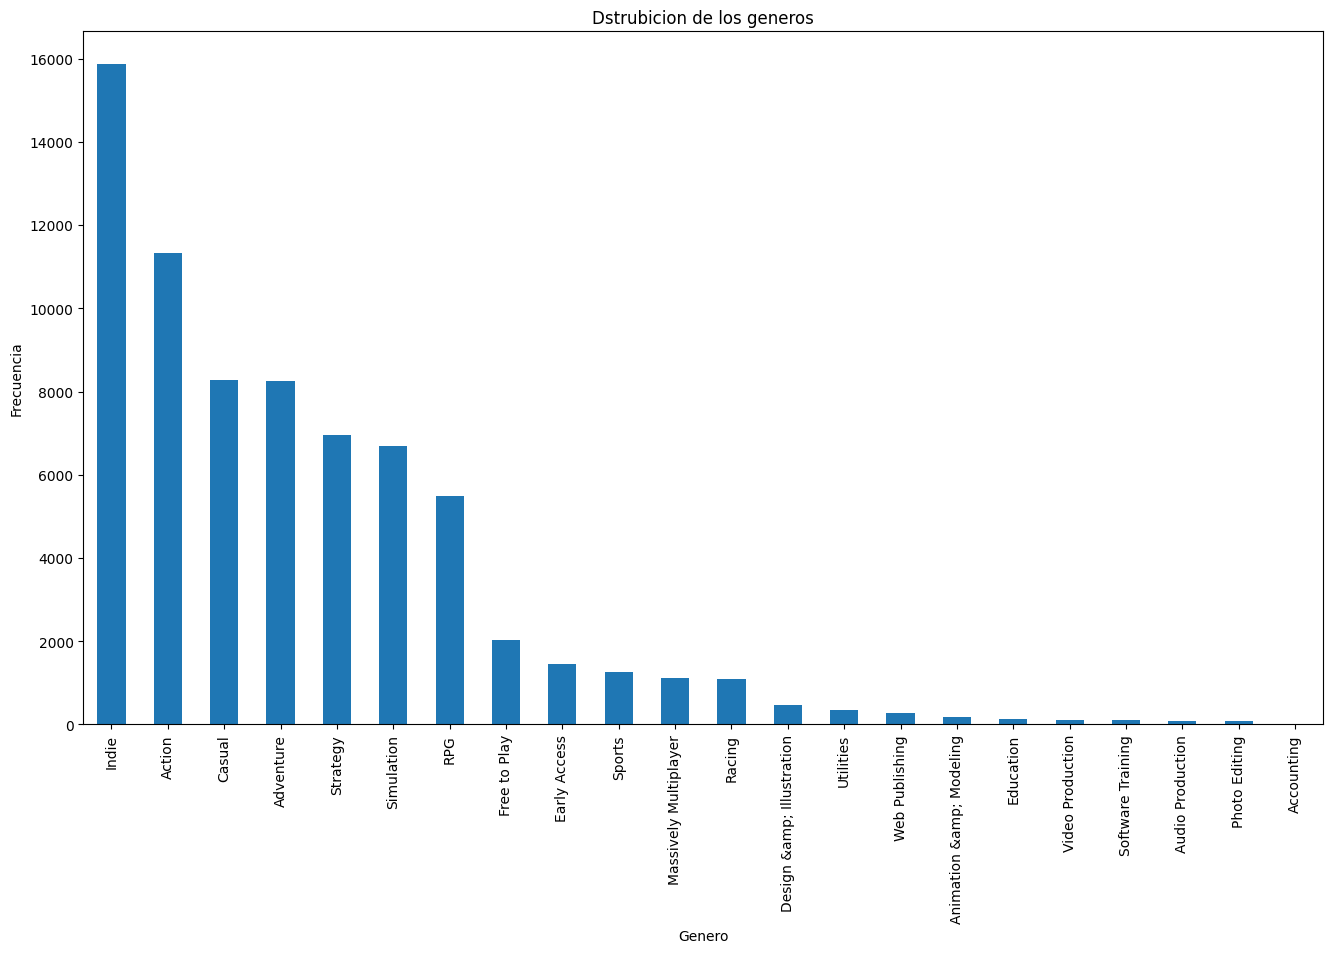

In [306]:
count_genres.plot(kind='bar', figsize=(16,9), title="Dstrubicion de los generos")
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.show()

In [307]:
wordcloud = WordCloud(width = 600, height = 300, background_color = "Black").generate_from_frequencies(count_genres)

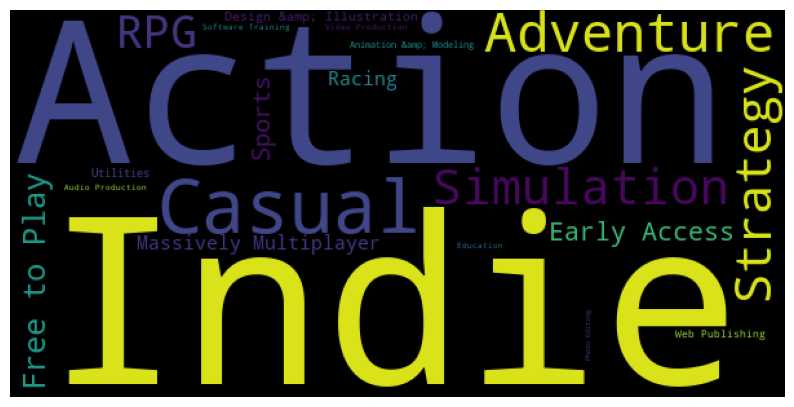

In [308]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')  # Desactivar los ejes
plt.show()

quiero ahora ver quienes son los desarrolladores que mas se repiten 

In [309]:
games['developer'].isna().sum()

3298

In [310]:
games = games.dropna(subset=['developer'])

In [311]:
developer = games['developer']

In [312]:
developer_counts = developer.value_counts()

In [313]:
wordcloud2 = WordCloud(width = 600, height = 300, background_color = "Black").generate_from_frequencies(developer_counts)

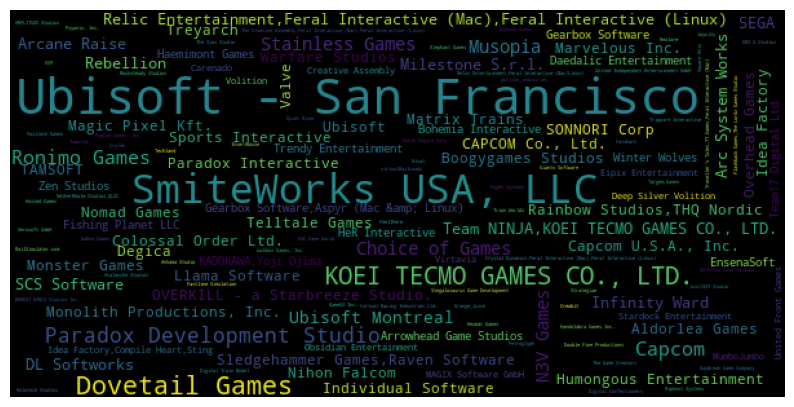

In [314]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud2)
plt.axis('off')  # Desactivar los ejes
plt.show()

voy a ver como se comporta la columna de sentimientos

In [315]:
games["sentiment"].unique()

array([nan, 'Mostly Positive', 'Mixed', '1 user reviews',
       '3 user reviews', 'Very Positive', 'Overwhelmingly Positive',
       '6 user reviews', '5 user reviews', '2 user reviews',
       'Very Negative', 'Positive', 'Mostly Negative', '9 user reviews',
       '8 user reviews', 'Negative', '4 user reviews', '7 user reviews',
       'Overwhelmingly Negative'], dtype=object)

In [316]:
estandar_sentimientos = ['Overwhelmingly Positive','Very Positive','Mostly Positive','Positive',
'Mixed','Negative','Mostly Negative','Very Negative','Overwhelmingly Negative']

In [317]:
games.isna().sum()

publisher          4818
genres              154
app_name              0
title                 0
url                   0
release_date         18
tags                135
discount_price    28632
reviews_url           1
specs               286
price              1235
early_access          0
id                    0
developer             0
sentiment          6311
metascore         26234
dtype: int64

In [318]:
games = games.dropna(subset=["sentiment"])

In [319]:
games.loc[~games['sentiment'].isin(estandar_sentimientos), 'sentiment'] = np.nan

In [320]:
games.isna().sum()

publisher          2084
genres              106
app_name              0
title                 0
url                   0
release_date          4
tags                 74
discount_price    22369
reviews_url           1
specs               237
price               738
early_access          0
id                    0
developer             0
sentiment          8479
metascore         19943
dtype: int64

In [321]:
games = games.dropna(subset=["sentiment"])

 lo que acabo de realizar es estandarizar la columna sentiment con sentimientos que en cierto modo pueden ser mas medibles y faciles de comprender mientras que reemplace los valores que no se encontraban en mi lista de sentimientos estandar y los cambio por valores Nan que luego elimine, ahora voy a mostrar la distribucion de estos sentimientos

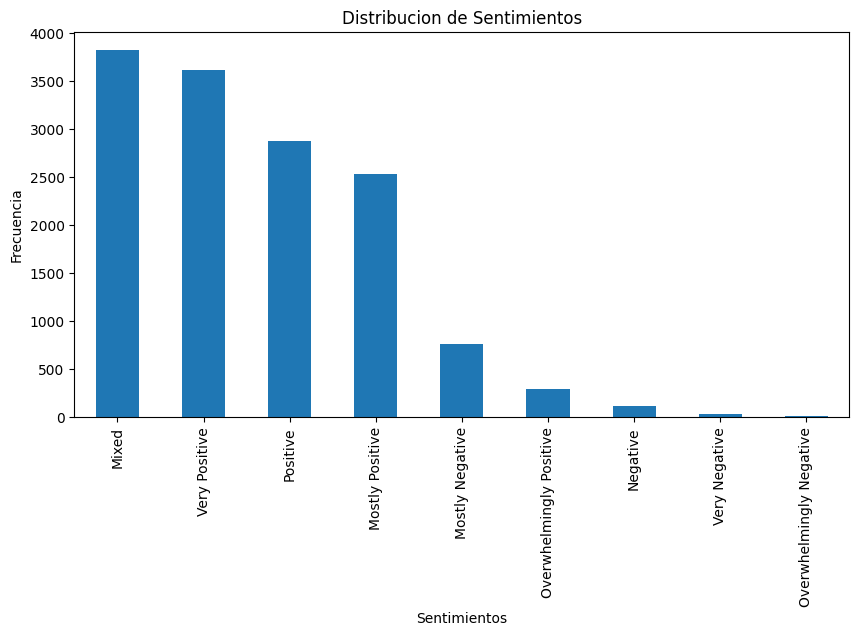

In [322]:
sentiment_counts = games['sentiment'].value_counts()

sentiment_counts.plot(kind="bar", figsize=(10,5))
plt.title("Distribucion de Sentimientos")
plt.xlabel('Sentimientos')
plt.ylabel("Frecuencia")
plt.show()

In [323]:
wordcloud3 = WordCloud(width = 600, height = 300, background_color = "Black").generate_from_frequencies(sentiment_counts)

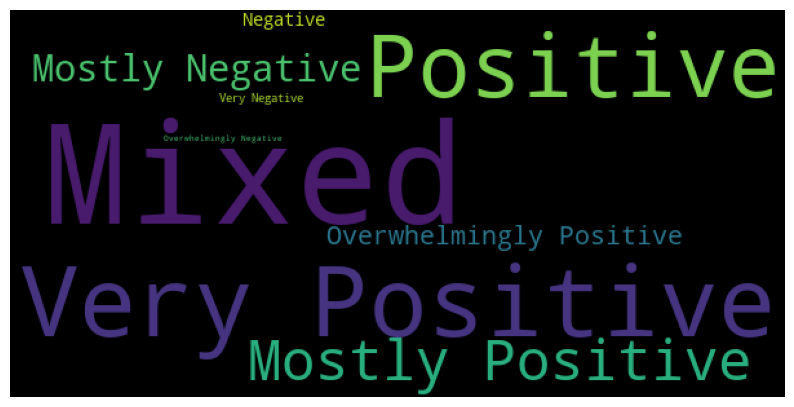

In [324]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud3)
plt.axis('off') 
plt.show()

voy a revisar como se comporta el metascore

In [325]:
games["metascore"].isna().sum()

11546

In [326]:
games["metascore"].notna().sum()

2500

In [327]:
games = games.dropna(subset=["metascore"])

In [328]:
games["metascore"] = pd.to_numeric(games['metascore'], errors = 'coerce')

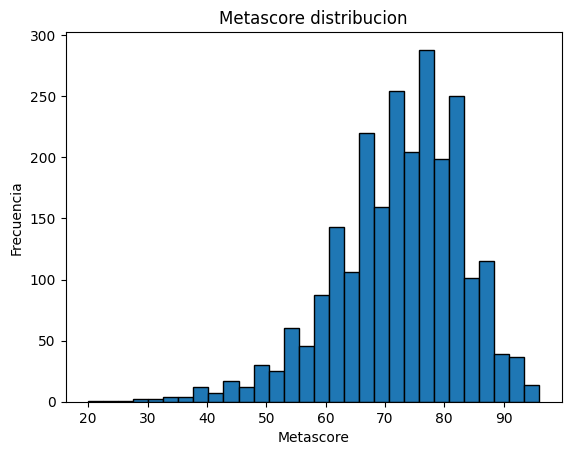

In [329]:
plt.hist(games["metascore"], bins = 30, edgecolor="k")
plt.title("Metascore distribucion")
plt.xlabel("Metascore")
plt.ylabel("Frecuencia")
plt.show()

In [330]:
games = games.dropna(subset=["metascore"])

In [331]:
games.isna().sum()

publisher           21
genres               6
app_name             0
title                0
url                  0
release_date         3
tags                 1
discount_price    2438
reviews_url          1
specs                3
price               15
early_access         0
id                   0
developer            0
sentiment            0
metascore            0
dtype: int64

luego de ver las difernetes distribuciones de los datos voy a volver a cargar mi archivo para poder creal el modelo de prediccion pero unicamente teniendo en cuenta algunas columnas  

In [332]:
df = pd.read_csv("Data/steam_games.csv")

In [333]:
columnas_modelo = ['release_date', 'genres', 'metascore', 'price', 'early_access' ]

In [334]:
df_model = df[columnas_modelo].copy()

In [335]:
df_model.head(10)

,release_date,genres,metascore,price,early_access
0,2018-01-04,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",NaN,4.99,False
1,2018-01-04,"['Free to Play', 'Indie', 'RPG', 'Strategy']",NaN,Free To Play,False
2,2017-07-24,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",NaN,Free to Play,False
3,2017-12-07,"['Action', 'Adventure', 'Casual']",NaN,0.99,False
4,NaN,NaN,NaN,2.99,False
5,2018-01-04,"['Action', 'Adventure', 'Simulation']",NaN,3.99,False
6,2018-01-04,"['Free to Play', 'Indie', 'Simulation', 'Sports']",NaN,9.99,False
7,2018-01-04,"['Free to Play', 'Indie', 'Simulation', 'Sports']",NaN,18.99,False
8,2018-01-04,"['Free to Play', 'Indie', 'Simulation', 'Sports']",NaN,29.99,False
9,2018-01-04,"['Casual', 'Indie', 'Racing', 'Simulation']",NaN,NaN,False


In [336]:
df_model.isna().sum()

release_date     2067
genres           3283
metascore       29528
price            1377
early_access        0
dtype: int64

In [337]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_date  30068 non-null  object 
 1   genres        28852 non-null  object 
 2   metascore     2607 non-null   float64
 3   price         30758 non-null  object 
 4   early_access  32135 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 1.0+ MB


los que voy a realizar acontinucacion es comenzar a realizar algunas tranformaciones de las columnas y vy a comenzar de la que menos errores tiene ni valores 


In [338]:
df_model["price"] = pd.to_numeric(df_model["price"], errors="coerce").fillna(0)

In [339]:
df_model['release_date'] = pd.to_datetime(df_model['release_date'], errors='coerce')

C:\Users\mateo\AppData\Local\Temp\ipykernel_6056\1930970262.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_model['release_date'] = pd.to_datetime(df_model['release_date'], errors='coerce')


In [340]:
df_model["release_year"] = df_model["release_date"].dt.year

In [341]:
df_model["metascore"] = pd.to_numeric(df_model["metascore"], errors="coerce")

In [342]:
df_model.dropna(subset=["metascore"],inplace=True)

In [343]:
df_model.dropna(subset=["genres"])

,release_date,genres,metascore,price,early_access,release_year
28,1998-11-08,['Action'],96.0,9.99,False,1998.0
39,2006-07-06,['Strategy'],84.0,6.99,False,2006.0
40,2006-07-06,['Strategy'],80.0,6.99,False,2006.0
41,2006-07-11,"['Action', 'Indie', 'RPG']",76.0,9.99,False,2006.0
55,2005-08-09,['Action'],70.0,9.99,False,2005.0
...,...,...,...,...,...,...
32109,2001-06-01,['Action'],71.0,4.99,False,2001.0
32112,2002-08-28,"['Action', 'Adventure']",88.0,14.99,False,2002.0
32114,2003-05-01,['Action'],79.0,4.99,False,2003.0
32116,2004-03-16,['Action'],93.0,14.99,False,2004.0


In [344]:
df_model['genres'].fillna("[]", inplace=True)

In [345]:
df_model['genres'] = df_model['genres'].apply(ast.literal_eval)

como carge el archivo .csv la columna 'genres' me estaba arrojando una cadena con el metodo reservado de AST ya la lista de la columna 'genres' ya tiene el formato correcto 

In [346]:
df_model.isna().sum()

release_date    54
genres           0
metascore        0
price            0
early_access     0
release_year    54
dtype: int64

In [347]:
df_model.dropna(subset=["release_year"])

,release_date,genres,metascore,price,early_access,release_year
28,1998-11-08,[Action],96.0,9.99,False,1998.0
39,2006-07-06,[Strategy],84.0,6.99,False,2006.0
40,2006-07-06,[Strategy],80.0,6.99,False,2006.0
41,2006-07-11,"[Action, Indie, RPG]",76.0,9.99,False,2006.0
55,2005-08-09,[Action],70.0,9.99,False,2005.0
...,...,...,...,...,...,...
32109,2001-06-01,[Action],71.0,4.99,False,2001.0
32112,2002-08-28,"[Action, Adventure]",88.0,14.99,False,2002.0
32114,2003-05-01,[Action],79.0,4.99,False,2003.0
32116,2004-03-16,[Action],93.0,14.99,False,2004.0


 el siguiente código transforma las listas de géneros en el DataFrame en variables codificadas one-hot para que puedan ser utilizadas en análisis posteriores. Cada género se convierte en una columna y se marca con 1 si está presente para un juego en particular.

In [348]:
generos_copia = df_model['genres'].explode().str.get_dummies()

In [349]:
df_model = pd.concat([df_model, generos_copia], axis=1)

In [350]:
df_model.drop(["genres"], axis=1)

,release_date,metascore,price,early_access,release_year,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,Video Production
28,1998-11-08,96.0,9.99,False,1998.0,1,0,0,0,0,0,0,0,0,0,0,0,0
39,2006-07-06,84.0,6.99,False,2006.0,0,0,0,0,0,0,0,0,0,0,0,1,0
40,2006-07-06,80.0,6.99,False,2006.0,0,0,0,0,0,0,0,0,0,0,0,1,0
41,2006-07-11,76.0,9.99,False,2006.0,1,0,0,0,0,0,0,0,0,0,0,0,0
41,2006-07-11,76.0,9.99,False,2006.0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32112,2002-08-28,88.0,14.99,False,2002.0,1,0,0,0,0,0,0,0,0,0,0,0,0
32112,2002-08-28,88.0,14.99,False,2002.0,0,1,0,0,0,0,0,0,0,0,0,0,0
32114,2003-05-01,79.0,4.99,False,2003.0,1,0,0,0,0,0,0,0,0,0,0,0,0
32116,2004-03-16,93.0,14.99,False,2004.0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [351]:
df_model.head()

,release_date,genres,metascore,price,early_access,release_year,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,Video Production
28,1998-11-08,[Action],96.0,9.99,False,1998.0,1,0,0,0,0,0,0,0,0,0,0,0,0
39,2006-07-06,[Strategy],84.0,6.99,False,2006.0,0,0,0,0,0,0,0,0,0,0,0,1,0
40,2006-07-06,[Strategy],80.0,6.99,False,2006.0,0,0,0,0,0,0,0,0,0,0,0,1,0
41,2006-07-11,"[Action, Indie, RPG]",76.0,9.99,False,2006.0,1,0,0,0,0,0,0,0,0,0,0,0,0
41,2006-07-11,"[Action, Indie, RPG]",76.0,9.99,False,2006.0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [352]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5430 entries, 28 to 32117
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   release_date           5370 non-null   datetime64[ns]
 1   genres                 5430 non-null   object        
 2   metascore              5430 non-null   float64       
 3   price                  5430 non-null   float64       
 4   early_access           5430 non-null   bool          
 5   release_year           5370 non-null   float64       
 6   Action                 5430 non-null   int64         
 7   Adventure              5430 non-null   int64         
 8   Casual                 5430 non-null   int64         
 9   Early Access           5430 non-null   int64         
 10  Free to Play           5430 non-null   int64         
 11  Indie                  5430 non-null   int64         
 12  Massively Multiplayer  5430 non-null   int64         
 13  R

In [353]:
df_model.drop(["release_date","genres"], axis=1, inplace=True)

In [354]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5430 entries, 28 to 32117
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   metascore              5430 non-null   float64
 1   price                  5430 non-null   float64
 2   early_access           5430 non-null   bool   
 3   release_year           5370 non-null   float64
 4   Action                 5430 non-null   int64  
 5   Adventure              5430 non-null   int64  
 6   Casual                 5430 non-null   int64  
 7   Early Access           5430 non-null   int64  
 8   Free to Play           5430 non-null   int64  
 9   Indie                  5430 non-null   int64  
 10  Massively Multiplayer  5430 non-null   int64  
 11  RPG                    5430 non-null   int64  
 12  Racing                 5430 non-null   int64  
 13  Simulation             5430 non-null   int64  
 14  Sports                 5430 non-null   int64  
 15  St

voy a comenzar a entrenar el modelo con la libreria de sklearn para calcular el MSE y el error cuadratico medio (RMSE) y poder hacer las diferentes predciicones

In [355]:
df_model.reset_index(drop=True, inplace=True)

In [356]:
# Elimino la columna "price" para usarla como variable objetivo para la predicción
X = df_model.drop(columns=['price'])
y = df_model['price']

In [357]:
df_model.dropna(subset=['price'], inplace=True)
X = df_model.drop(columns=['price'])
y = df_model['price']

In [358]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [359]:
# Crear el modelo de regresión lineal múltiple
model = LinearRegression()

In [362]:
X_train.isna().sum()

metascore                 0
early_access              0
release_year             54
Action                    0
Adventure                 0
Casual                    0
Early Access              0
Free to Play              0
Indie                     0
Massively Multiplayer     0
RPG                       0
Racing                    0
Simulation                0
Sports                    0
Strategy                  0
Video Production          0
dtype: int64

In [363]:
X_train["release_year"] = X_train["release_year"].fillna(9999)

In [365]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [368]:
X_test.isna().sum()

metascore                0
early_access             0
release_year             6
Action                   0
Adventure                0
Casual                   0
Early Access             0
Free to Play             0
Indie                    0
Massively Multiplayer    0
RPG                      0
Racing                   0
Simulation               0
Sports                   0
Strategy                 0
Video Production         0
dtype: int64

In [369]:
X_test["release_year"] = X_test["release_year"].fillna(9999)

In [370]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [371]:
# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)

In [372]:
# Calcular el RMSE (raíz cuadrada del MSE)
rmse = np.sqrt(mse)

In [373]:
# Mostrar el RMSE
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 9.908795880278168


In [374]:
# Guardar el modelo en un archivo pickle
with open('Data/modelo.pkl', 'wb') as file:
    pickle.dump(model, file)


In [375]:
# Calcular las diferencias (residuos)
diferencias = y_test - y_pred

In [376]:
diferencias

5253    -4.753774
4946    -3.126887
2146     3.770117
501    -16.537356
4460    -1.064539
          ...    
1041    -4.015866
4994   -18.183002
2458    -1.288841
3732    -5.092978
2406     4.905909
Name: price, Length: 1086, dtype: float64

In [377]:
# Crear un DataFrame para visualizar las diferencias junto con las predicciones y los valores reales
resultados = pd.DataFrame({'Precio Real': y_test, 'Predicción': y_pred, 'Diferencia': diferencias})

In [378]:
resultados.head()

,Precio Real,Predicción,Diferencia
5253,9.99,14.743774,-4.753774
4946,12.99,16.116887,-3.126887
2146,19.99,16.219883,3.770117
501,0.00,16.537356,-16.537356
4460,14.99,16.054539,-1.064539


In [379]:
# Mostrar algunos ejemplos de resultados
print(resultados.iloc[5:25])

      Precio Real  Predicción  Diferencia
4035        11.99   16.381027   -4.391027
1281        19.99   15.816082    4.173918
5169         9.99   13.045876   -3.055876
5030         5.99   16.269264  -10.279264
240          9.99   12.213147   -2.223147
1782        14.99   12.711769    2.278231
1345        14.99   10.600465    4.389535
4829         9.99   10.754818   -0.764818
381          0.00    6.394070   -6.394070
2414        14.99   17.408213   -2.418213
2357        19.99   15.497497    4.492503
3063        19.99   15.568883    4.421117
351          9.99   12.864146   -2.874146
2416        29.99   15.251161   14.738839
4772         0.00   13.515146  -13.515146
4357        39.99   17.562567   22.427433
491          4.99   15.278199  -10.288199
553         19.99   16.210005    3.779995
5177         5.99   17.054066  -11.064066
4428        14.99   16.949899   -1.959899


(1086, 3)